In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
red, blue, white = ('#E24A33', '#348ABD', '#FFFFFF')

In [2]:
import os
import sys

CURRENT_DIR = os.path.abspath(os.path.dirname(__name__))
LIBRARY_DIR = os.path.join(CURRENT_DIR, '..', '..')

sys.path.append(LIBRARY_DIR)

In [3]:
import os

CURRENT_DIR = os.path.abspath(os.path.dirname(__name__))

def saveas(name):
    image_name = '{}.png'.format(name)
    image_path = os.path.join(LIBRARY_DIR, 'site', '2017', '12', '17', 'images', image_name)
    plt.savefig(image_path, facecolor='#f8fafb', bbox_inches='tight')

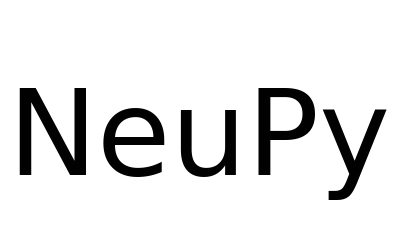

In [4]:
ax = plt.gca()
ax.patch.set_facecolor(white)
ax.text(0, 0.25, 'NeuPy', fontsize=120)

plt.xticks([])
plt.yticks([])

plt.savefig('neupy-text.png', facecolor=white, bbox_inches='tight')

/Users/itdxer/.pyenv/versions/3.6.0/envs/neupy36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


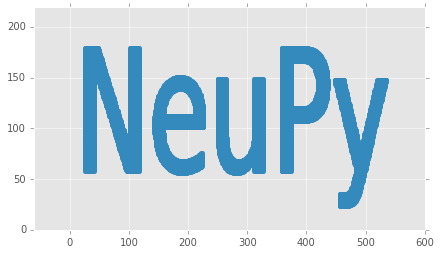

In [5]:
import numpy as np
from scipy.misc import imread

neupy_text = imread('neupy-text.png') 
# Encode black pixels as 1 and white pixels as 0
neupy_text = (1 - neupy_text / 255.).round().max(axis=2)

data = []
for (x, y), value in np.ndenumerate(neupy_text):
    if value == 1:
        data.append([y, -x + 300])
        
data = np.array(data)

plt.figure(figsize=(7, 4))
plt.scatter(*data.T, color=blue)

plt.xlim(-60, 600)
plt.ylim(0, 220)

saveas('neupy-text-data-points')

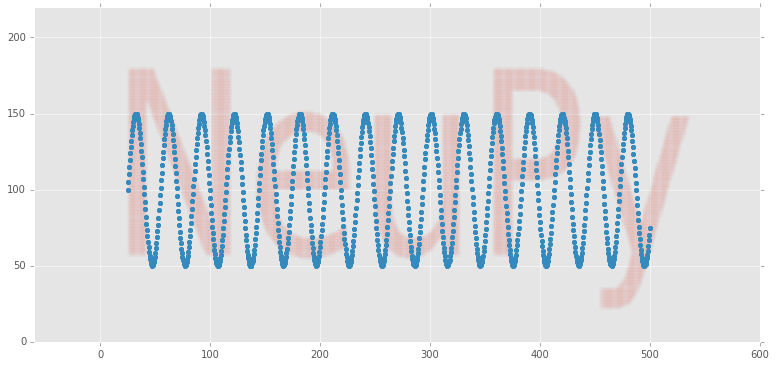

In [6]:
# Generate weights and arange them along sine wave.
# Because sine way goes up and down the final pattern
# will look more interesting.
n = 1000
weight = np.zeros((2, n))
weight[0, :] = np.linspace(25, 500, n)
weight[1, :] = (np.sin(np.linspace(0, 100, n)) + 1) * 50 + 50
weight = np.concatenate([weight, weight], axis=1)

plt.figure(figsize=(13, 6))
plt.scatter(*weight, zorder=100, color=blue)
plt.scatter(*data.T, color=red, alpha=0.01)

plt.xlim(-60, 600)
plt.ylim(0, 220)

saveas('initialized-sofm-weights')

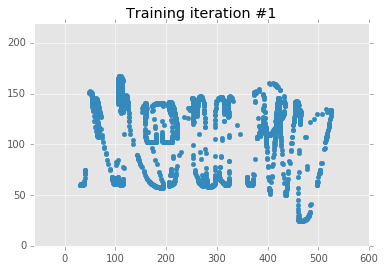

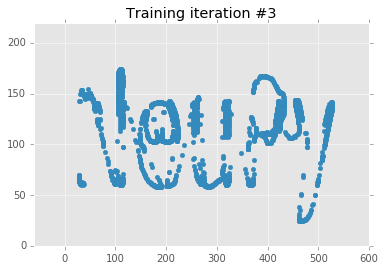

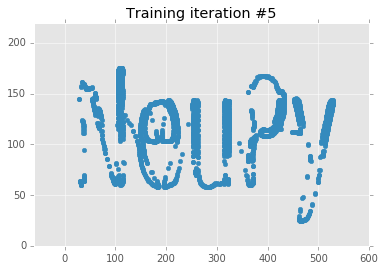

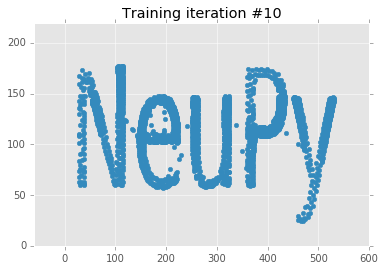

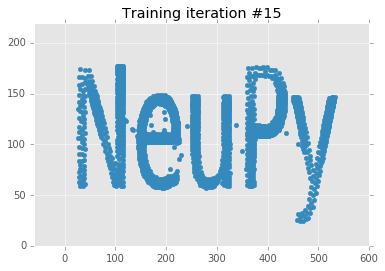

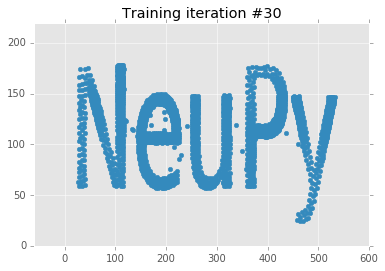

In [7]:
from neupy import algorithms

sofm = algorithms.SOFM(
    n_inputs=2,
    features_grid=(2, n),
    weight=weight,
    
    # With large number of training samples it's safer
    # to use small step (learning rate)
    step=0.05,
    
    # Learning radis large for first 10 iterations, after that we
    # assume that neurons found good positions on the text and we just
    # need to move them a bit independentl in order to cover text better
    learning_radius=10,
    
    # after 10 iteration learning radius would be 0
    reduce_radius_after=1,
    
    # slowly decrease step size
    reduce_step_after=10,
)

for iteration in range(1, 31):
    sofm.train(data, epochs=1)
    
    if iteration in (1, 3, 5, 10, 15, 30):
        plt.title('Training iteration #{}'.format(iteration))
        plt.scatter(*sofm.weight, color=blue)

        plt.xlim(-60, 600)
        plt.ylim(0, 220)

        saveas('sofm-training-iteration-{}'.format(iteration))
        plt.show()

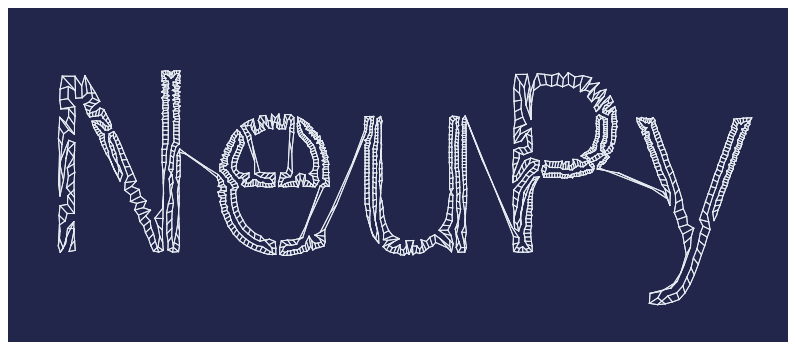

In [8]:
# Function comes from the neupy's examples folder
from examples.competitive.utils import plot_2d_grid

background_color = '#22264b'
text_color = '#e8edf3'

fig = plt.figure(figsize=(14, 6))
ax = plt.gca()
ax.patch.set_facecolor(background_color)

sofm_weights = sofm.weight.T.reshape((2, n, 2))
plot_2d_grid(np.transpose(sofm_weights, (2, 0, 1)), color=text_color)

plt.xticks([])
plt.yticks([])

# Coordinates were picked so that text
# will be in the center of the image
plt.ylim(0, 220)
plt.xlim(-10, 560)

plt.show()